# 1. Importar librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Supervisado\\pediccion_abandono_empleo\\utils.py'>

# 2. Importar datos

In [3]:
df = pd.read_csv('Datasets/datos_limpios.csv')
df.job_level = df.job_level.astype(str)
df.stock_option_level = df.stock_option_level.astype(str)
df.drop(['employee_id'], axis=1, inplace=True)

In [4]:
df.shape

(4401, 26)

# 3. Tratamiento de valores atípicos

## 3.1. Observar valores atípicos

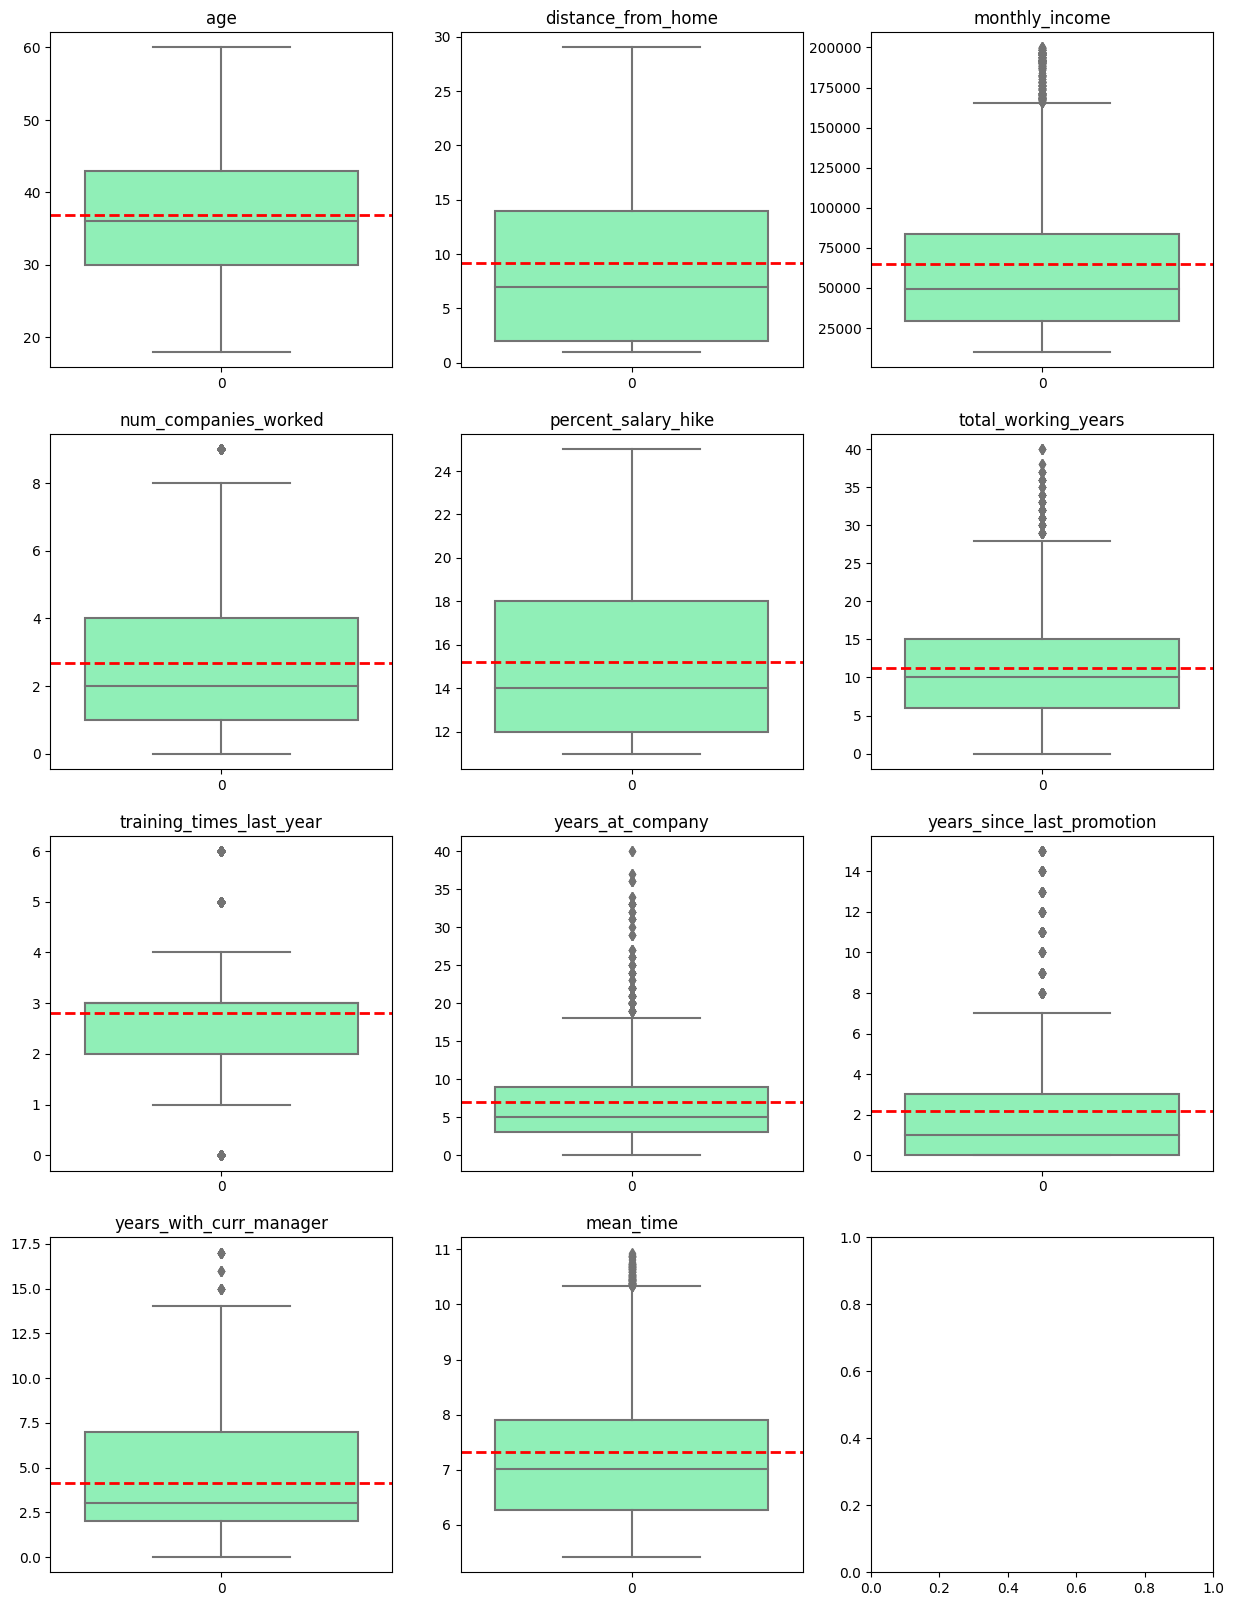

In [6]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

rows = [0,0,0,1,1,1,2,2,2,3,3]
cols = [0,1,2,0,1,2,0,1,2,0,1]
variables = df.select_dtypes(include=['int64', 'float64']).columns

for i in range(len(variables)):

    sns.boxplot(df[variables[i]], palette='rainbow', ax=axs[rows[i], cols[i]])
    axs[rows[i], cols[i]].set_title(variables[i])
    axs[rows[i], cols[i]].axhline(df[variables[i]].mean(), color='r',linestyle='dashed',linewidth=2)

## 3.2. Técnica de imputación

#### Mediana por grupo con threshold de 2IQR (2 rangos intercuartílicos)

Debido a la naturaleza de variables como **Ingreso mensual** se encuentran varoles que son muy extremos, pues es normal que hayan unos pocos empleados en la empresa que ganen mucho más que el resto de los empleados, esto depende del rol, el departamento y el nivel del puesto. También en variables **Años trabajando**, **Años en la compañía**, **Años desde la última promoción** y **Años bajo el mando del mismo jefe** es natural encontrar valores extremos.

Durante el análisis exploratorio de las variables numéricas frente a la variable objetivo y el análisis de correlaciones, se evidencia una diferencia de algunas distribuciones dependiendo de si el emplado abandonó o no. Por esto, se decidió imputar valores atípicos con la técnica de **mediana por grupo**, donde los grupos serían si el empleado abandonó o no; Además, se imputarán solo los valores que sean muy extremos usando un **threshold de 2IQR (2 rangos intercuartílicos)**, de esta forma evitamos al máximo alterar la naturaleza de los datos.

## 3.3. Imputar valores atípicos

In [15]:
df2 = df.copy()

### Ingresos mensuales

In [17]:
upper_mi, lower_mi = utils.outlier_IQR(df2, 'monthly_income', 2)

IQR is: 54690.0
Threshold is: 109380.0
Lower bound is: -80270.0
Upper bound is: 193180.0
total number of outliers are: 93


In [18]:
df2 = utils.imputar_outliers(df2, 'monthly_income', lower_mi, upper_mi)

### Total de años trabajando

In [19]:
upper_twy, lower_twy = utils.outlier_IQR(df2, 'total_working_years', 2)

IQR is: 9.0
Threshold is: 18.0
Lower bound is: -12.0
Upper bound is: 33.0
total number of outliers are: 63


In [20]:
df2 = utils.imputar_outliers(df2, 'total_working_years', lower_twy, upper_twy)

### Años en la compañía

In [21]:
upper_yac, lower_yac = utils.outlier_IQR(df2, 'years_at_company', 2)

IQR is: 6.0
Threshold is: 12.0
Lower bound is: -9.0
Upper bound is: 21.0
total number of outliers are: 156


In [22]:
df2 = utils.imputar_outliers(df2, 'years_at_company', lower_yac, upper_yac)

### Años desde la última promoción

In [23]:
upper_yslp, lower_yslp = utils.outlier_IQR(df2, 'years_since_last_promotion', 2)

IQR is: 3.0
Threshold is: 6.0
Lower bound is: -6.0
Upper bound is: 9.0
total number of outliers are: 215


In [24]:
df2 = utils.imputar_outliers(df2, 'years_since_last_promotion', lower_yslp, upper_yslp)

### Años con el jefe actual

In [25]:
upper_ywcm, lower_ywcm = utils.outlier_IQR(df2, 'years_with_curr_manager', 2)

IQR is: 5.0
Threshold is: 10.0
Lower bound is: -8.0
Upper bound is: 17.0
total number of outliers are: 0


In [26]:
df2 = utils.imputar_outliers(df2, 'years_since_last_promotion', lower_ywcm, upper_ywcm)

### Tiempo promedio de trabao al día del empleado

In [27]:
upper_mt, lower_mt = utils.outlier_IQR(df2, 'mean_time', 2)

IQR is: 1.6218999999999992
Threshold is: 3.2437999999999985
Lower bound is: 3.034600000000002
Upper bound is: 11.144099999999998
total number of outliers are: 0


In [28]:
df2 = utils.imputar_outliers(df2, 'mean_time', lower_mt, upper_mt)

## 3.4. Revisar valores atípicos nuevamente

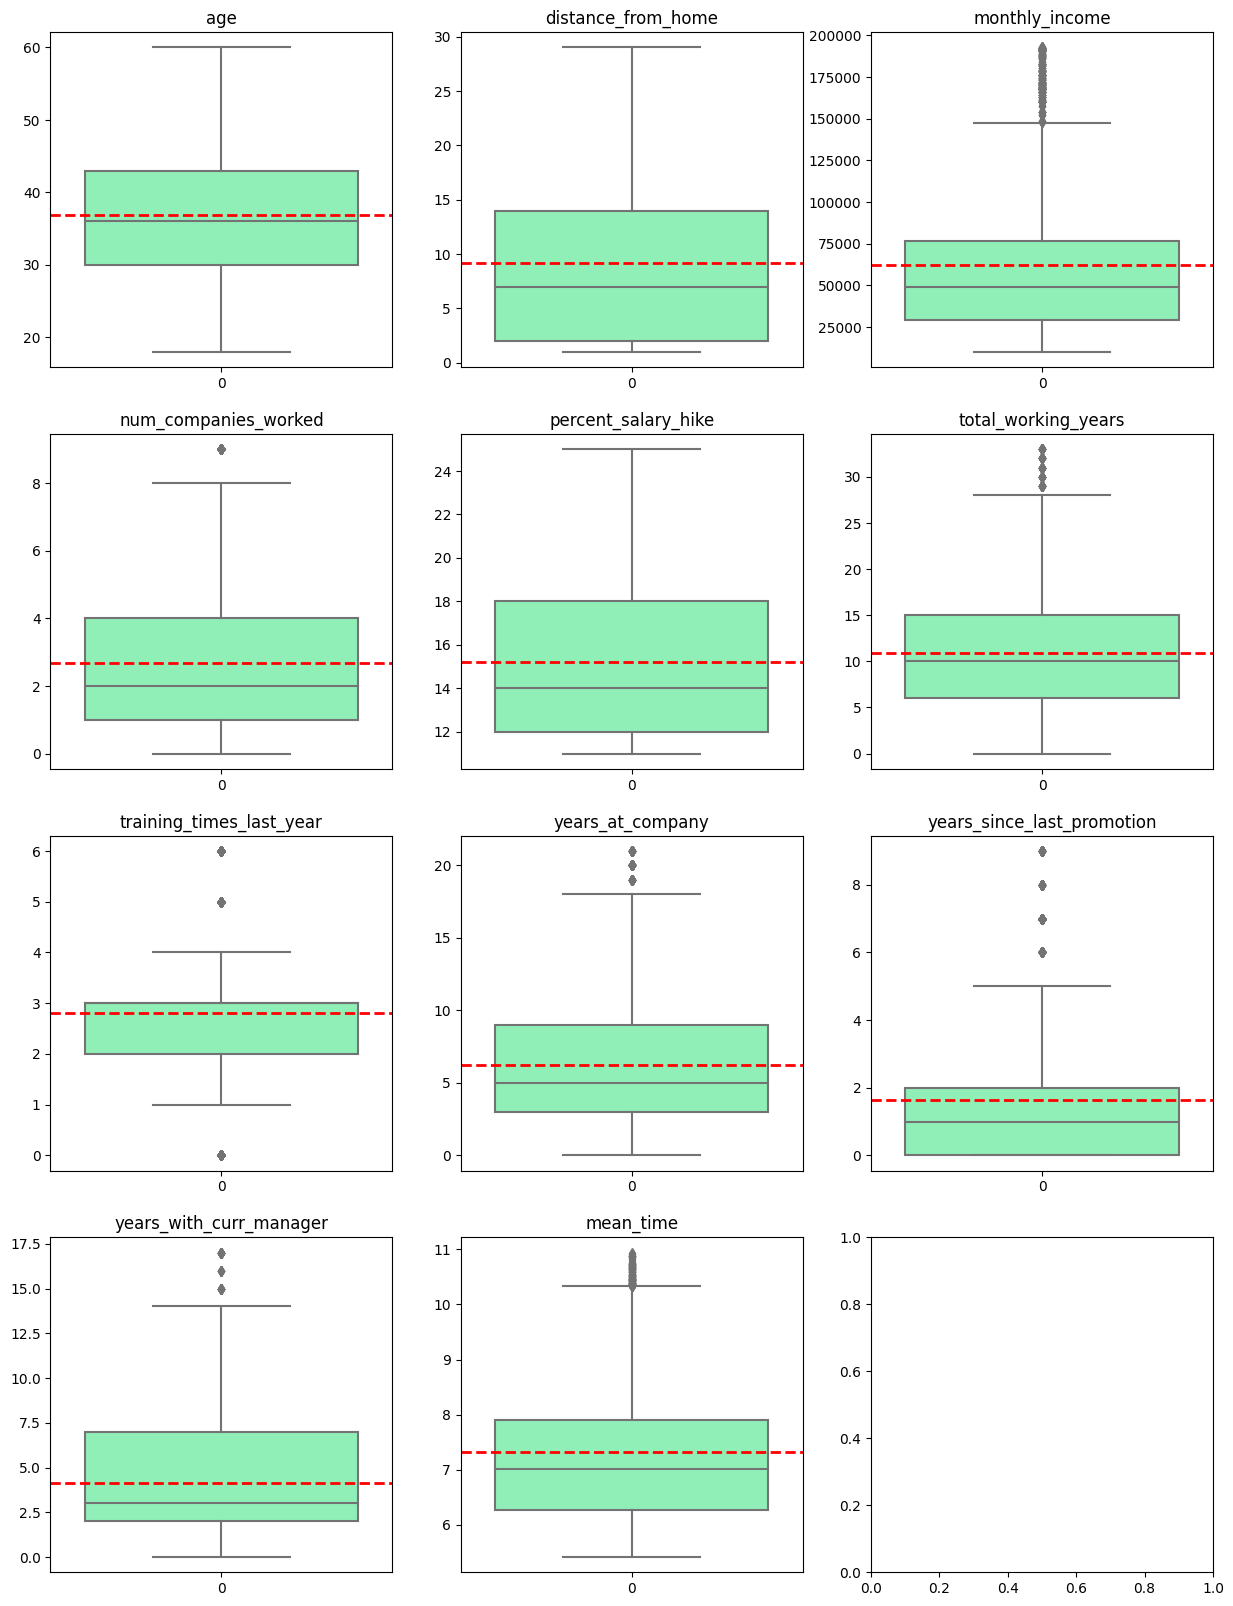

In [29]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

rows = [0,0,0,1,1,1,2,2,2,3,3]
cols = [0,1,2,0,1,2,0,1,2,0,1]
variables = df2.select_dtypes(include=['int64', 'float64']).columns

for i in range(len(variables)):

    sns.boxplot(df2[variables[i]], palette='rainbow', ax=axs[rows[i], cols[i]])
    axs[rows[i], cols[i]].set_title(variables[i])
    axs[rows[i], cols[i]].axhline(df2[variables[i]].mean(), color='r',linestyle='dashed',linewidth=2)

Hay nuevos valores atípicos, pero estos son naturales en estos datos, imputarlos alteraría mucho la realidad de los datos.

# 4. Exportar datos sin outliers

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         4401 non-null   int64  
 1   attrition                   4401 non-null   object 
 2   business_travel             4401 non-null   object 
 3   department                  4401 non-null   object 
 4   distance_from_home          4401 non-null   int64  
 5   education                   4401 non-null   object 
 6   education_field             4401 non-null   object 
 7   gender                      4401 non-null   object 
 8   job_level                   4401 non-null   object 
 9   job_role                    4401 non-null   object 
 10  marital_status              4401 non-null   object 
 11  monthly_income              4401 non-null   float64
 12  num_companies_worked        4401 non-null   float64
 13  percent_salary_hike         4401 

In [31]:
df2.to_csv('Datasets/datos_preparados.csv', index=False)